<a href="https://colab.research.google.com/github/CajunCompiler/SYBCA-SEM4/blob/main/Logistic_Regression_on_Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Logistic Regression on Iris Dataset**

In [8]:
#1. Import required libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [9]:
#2. Load the dataset (labeled data)
data = load_iris()
X = data.data
y = data.target
# Features
# Class labels
#This is supervised learning because labels (y) are available.


In [19]:
# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [20]:
#Print actual content at the training and test indices
train_data = X_train
test_data = X_test

In [22]:
# Convert NumPy arrays to Pandas DataFrames
train_data = pd.DataFrame(X_train, columns=data.feature_names)
test_data = pd.DataFrame(X_test, columns=data.feature_names)

# Add target column
train_data['target'] = y_train
test_data['target'] = y_test

In [12]:
#4. Create and train the classification model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

In [13]:
#5. Make predictions
y_pred = model.predict(X_test)

In [23]:
#6. Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [24]:
#accuracy to percentage
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100

print(f"Accuracy: {accuracy_percentage:.2f}%")


Accuracy: 100.00%


In [25]:
#Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)  # 5-fold CV
print("Mean CV Accuracy:", scores.mean())


Mean CV Accuracy: 0.9733333333333334


In [26]:
#Precission/Recall Curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, RocCurveDisplay

y_bin = label_binarize(y_test, classes=[0,1,2])
y_score = model.predict_proba(X_test)
roc_auc_score(y_bin, y_score, average='macro', multi_class='ovr')


np.float64(1.0)

In [27]:
#Feature Analysis
coeff_df = pd.DataFrame({
    'Feature': data.feature_names,
    'Coefficient': model.coef_[0]  # For class 0 vs rest
})
print(coeff_df)


             Feature  Coefficient
0  sepal length (cm)    -0.393456
1   sepal width (cm)     0.962518
2  petal length (cm)    -2.375124
3   petal width (cm)    -0.998746


Data Visualization

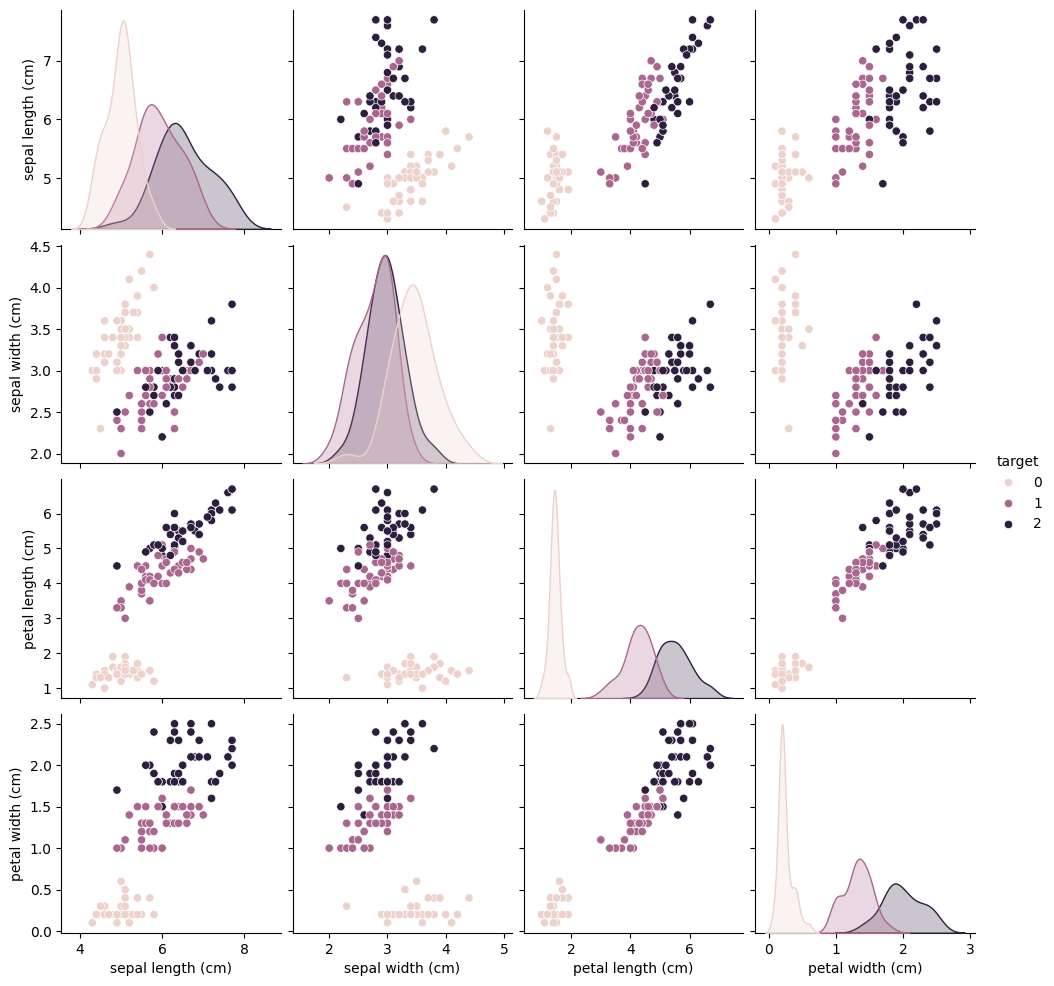

In [28]:
#Scatter Plot
import seaborn as sns
sns.pairplot(train_data, hue='target')


Model Turning

In [29]:
model = LogisticRegression(max_iter=500, solver='liblinear')
#maxiter

In [30]:
#pipeline Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=200))
pipe.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=200))])